In [1]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import umap
import scipy
import math

In [2]:
#Get well level data, obtained by running downstream analysis
well_data_pd = pd.read_csv('./data/well_level_data_efn128precomp_cpcells.csv')
columns = [str(i) for i in range(6400)]
well_data = well_data_pd[columns].to_numpy()
well_data_pd

,Plate,Well,Treatment,Replicate,broad_sample,0,1,2,3,4,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,24277,a01,BRD-K18250272-003-03-7@3.02251611288227,1,BRD-K18250272-003-03-7,-0.008983,-0.041875,0.081480,-0.115740,-0.065593,...,0.035630,-0.103404,-0.246975,0.056697,-0.075946,-0.100728,0.027975,0.067247,0.065430,-0.462900
1,24277,a02,BRD-K18316707-001-01-9@5,1,BRD-K18316707-001-01-9,-0.017501,-0.038517,0.006906,-0.128011,-0.051329,...,0.044019,-0.024500,-0.258161,0.038298,0.104580,-0.013500,0.025630,0.039174,0.025625,-0.336632
2,24277,a03,BRD-K18438502-001-02-6@5,1,BRD-K18438502-001-02-6,-0.011443,0.006393,-0.059753,-0.074142,-0.038863,...,-0.013475,-0.047966,-0.177726,0.036587,-0.238799,-0.083947,0.037512,0.083663,0.000546,-0.715261
3,24277,a04,BRD-K18550767-001-02-8@5,1,BRD-K18550767-001-02-8,0.010552,0.018878,-0.119179,-0.021849,-0.020971,...,0.078336,-0.135247,-0.135232,0.050252,0.051219,0.055443,0.032945,0.064290,0.064767,-0.670791
4,24277,a05,BRD-K18574842-323-03-3@2.19548690004561,1,BRD-K18574842-323-03-3,0.009085,-0.037968,-0.170535,-0.022438,-0.041700,...,0.003297,-0.030259,-0.442817,-0.010885,-0.134319,-0.030113,0.022731,0.072681,0.017128,-0.822711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21101,26247,p20,BRD-K98157055-001-04-2@5,8,BRD-K98157055-001-04-2,-0.024503,-0.005450,-0.038651,-0.012089,-0.025921,...,0.009518,-0.125558,0.010167,0.051168,-0.094723,-0.016884,0.006639,0.010306,-0.040601,-0.085917
21102,26247,p21,BRD-K98174813-001-05-7@5.8974378934918,8,BRD-K98174813-001-05-7,0.002260,-0.011584,-0.046170,0.064195,-0.037000,...,0.021791,-0.047820,-0.001925,-0.010454,0.144566,0.051587,-0.018781,-0.004731,-0.000796,-0.216064
21103,26247,p22,BRD-K98281970-001-02-6@5,8,BRD-K98281970-001-02-6,-0.028181,0.008570,-0.125036,0.113517,-0.034688,...,0.047366,-0.069308,-0.054398,0.028899,0.168629,-0.000358,0.004422,0.011141,-0.015507,0.104357
21104,26247,p23,BRD-K98297262-001-01-1@5,8,BRD-K98297262-001-01-1,-0.054988,0.084148,0.360762,-0.277536,-0.010146,...,0.004952,-0.240717,-0.103160,-0.046482,-0.204791,0.446288,0.013553,0.058196,0.031181,-1.031886


# Run PCA

In [3]:
pca = PCA(.95)
pca = pca.fit(well_data)
pca_result = pca.transform(well_data)
useful_components = len(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.005])

<BarContainer object of 30 artists>

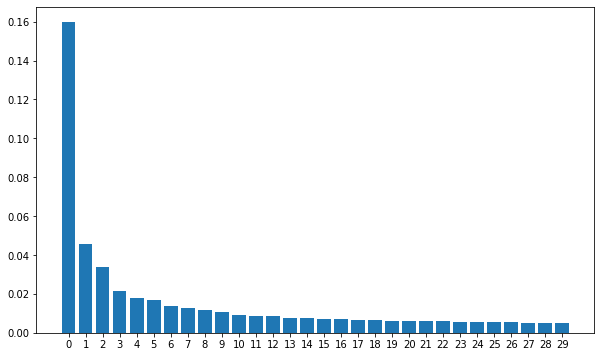

In [8]:
plt.figure(figsize=(10,6))
plt.xticks(range(useful_components))
plt.bar(height = pca.explained_variance_ratio_[:useful_components], x = range(len(pca.explained_variance_ratio_[:useful_components])))

In [9]:
b = well_data_pd[['Plate', 'Well', 'Treatment']].to_numpy()
a = np.column_stack((b, pca_result))[:,0:useful_components+3]

In [10]:
columns_pca = ['PCA ' + str(i) for i in range(1,useful_components+1)]
principalDf = pd.DataFrame(data = a, columns = ['Plate', 'Well','Treatment'] + columns_pca)
principalDf['control'] = principalDf['Treatment'] == 'NA@NA'
for i in range(1, useful_components+1):
    principalDf['PCA {}'.format(i)] = principalDf['PCA {}'.format(i)].astype('float32')

<Figure size 864x864 with 0 Axes>

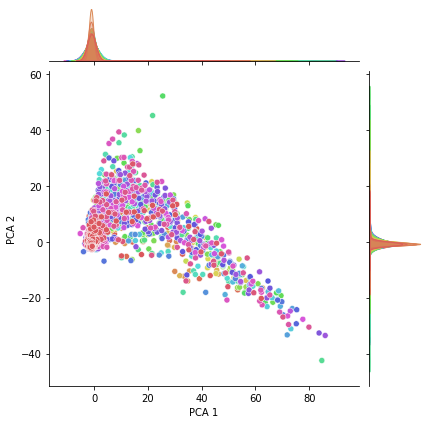

<Figure size 864x864 with 0 Axes>

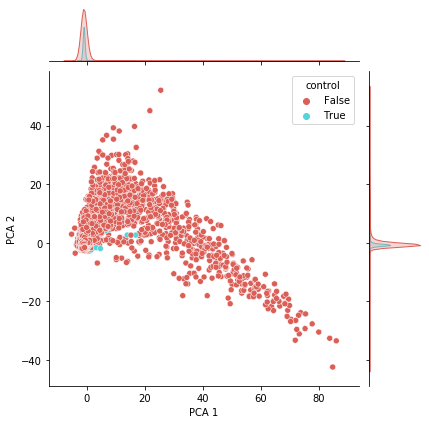

<Figure size 864x864 with 0 Axes>

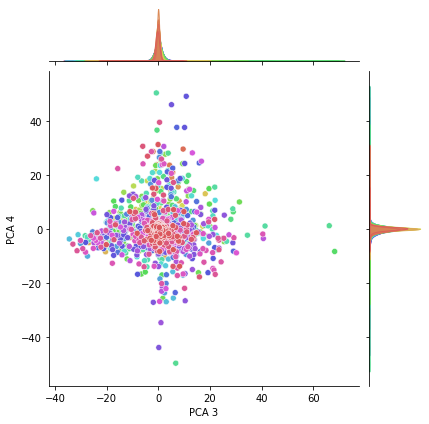

<Figure size 864x864 with 0 Axes>

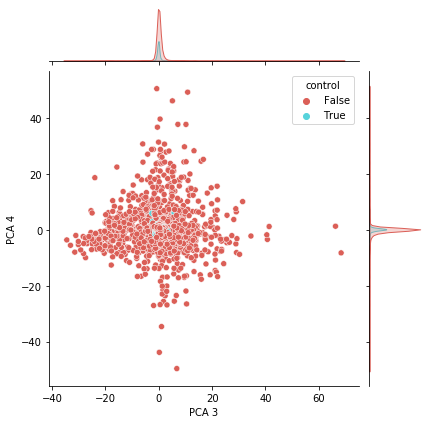

<Figure size 864x864 with 0 Axes>

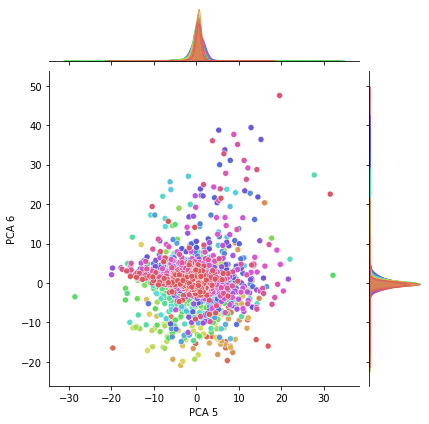

<Figure size 864x864 with 0 Axes>

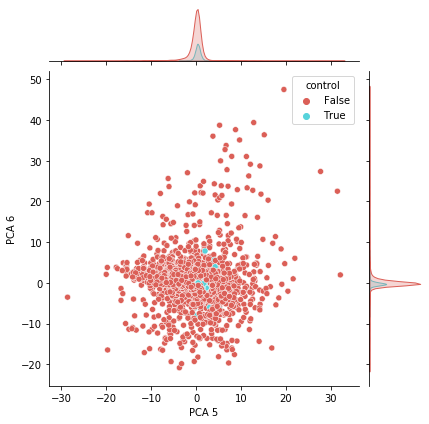

<Figure size 864x864 with 0 Axes>

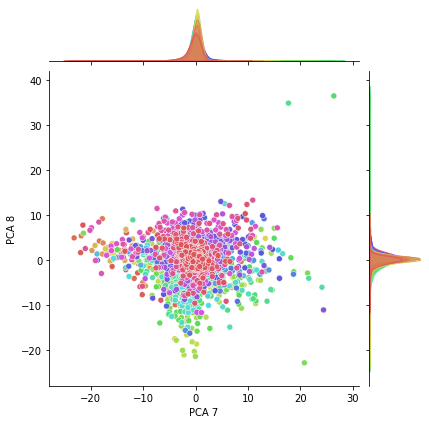

<Figure size 864x864 with 0 Axes>

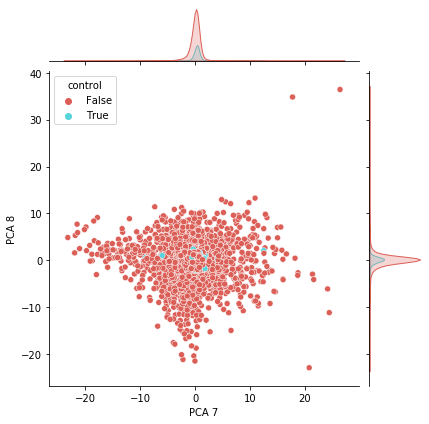

<Figure size 864x864 with 0 Axes>

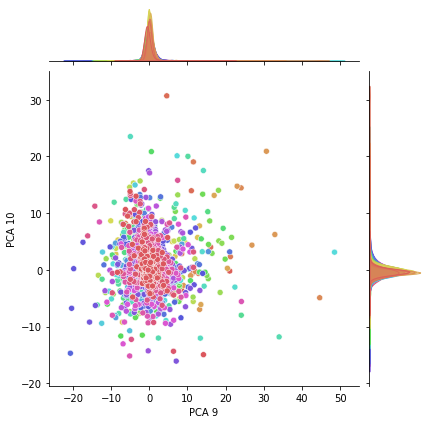

<Figure size 864x864 with 0 Axes>

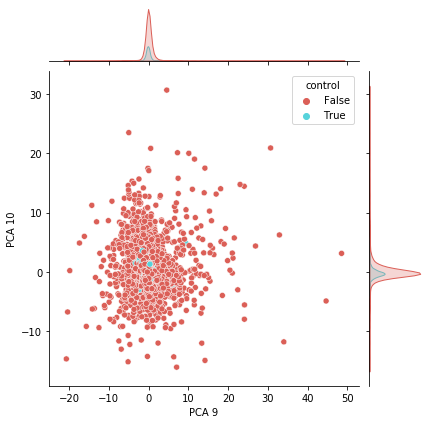

<Figure size 864x864 with 0 Axes>

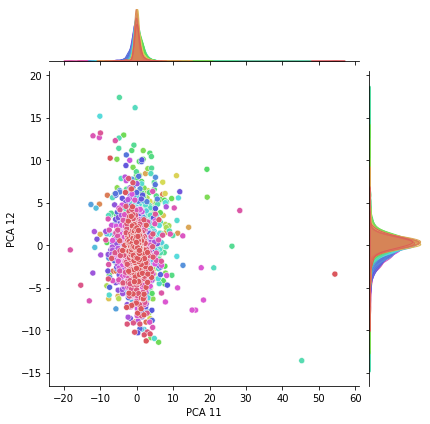

<Figure size 864x864 with 0 Axes>

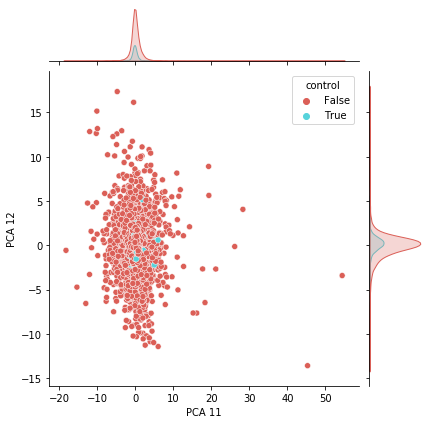

<Figure size 864x864 with 0 Axes>

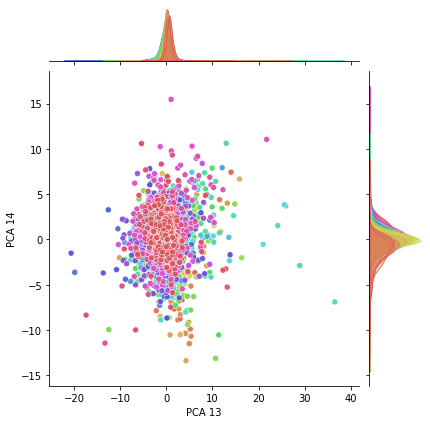

<Figure size 864x864 with 0 Axes>

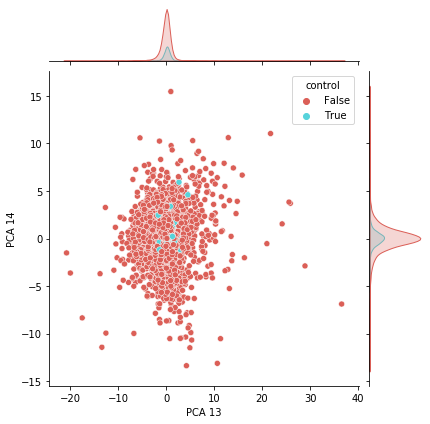

<Figure size 864x864 with 0 Axes>

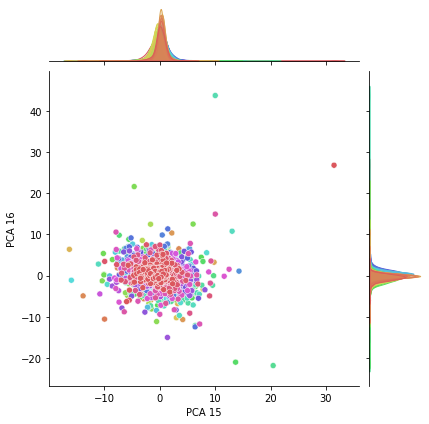

<Figure size 864x864 with 0 Axes>

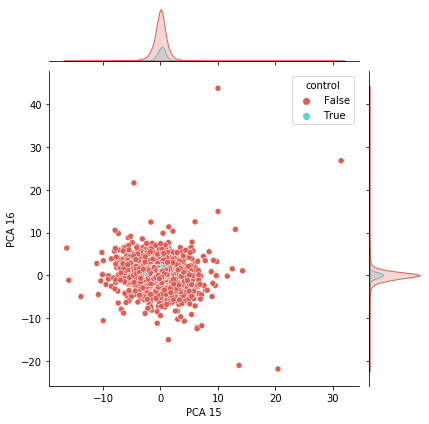

<Figure size 864x864 with 0 Axes>

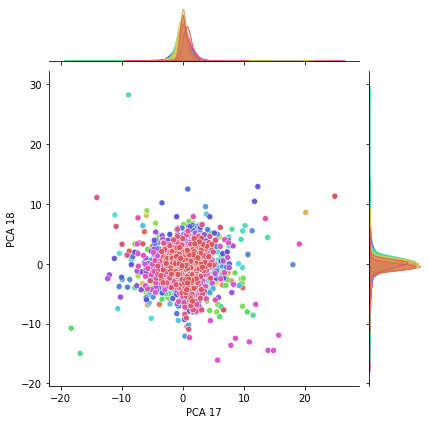

<Figure size 864x864 with 0 Axes>

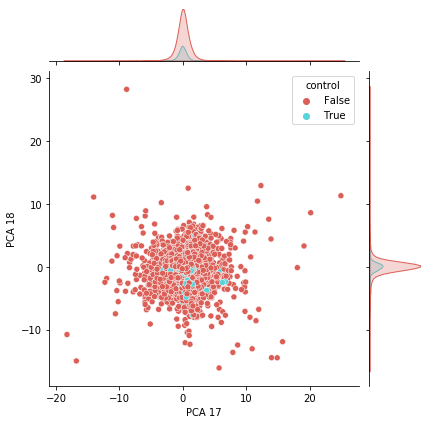

<Figure size 864x864 with 0 Axes>

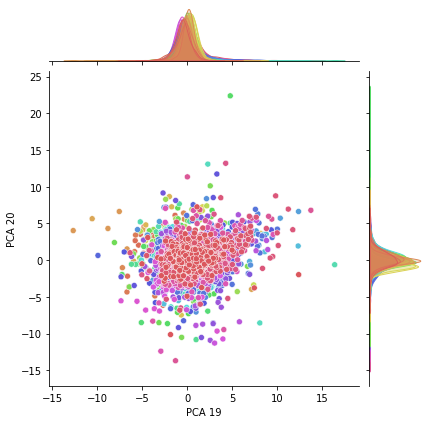

<Figure size 864x864 with 0 Axes>

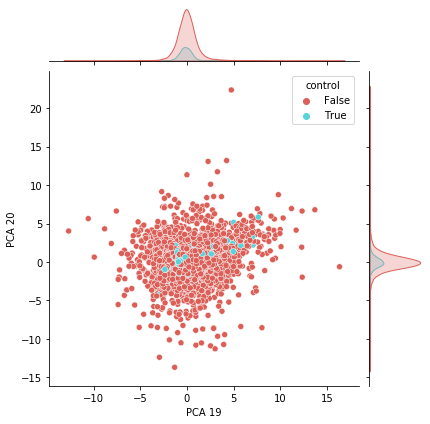

<Figure size 864x864 with 0 Axes>

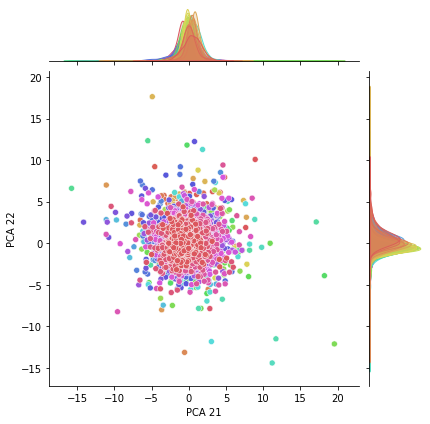

<Figure size 864x864 with 0 Axes>

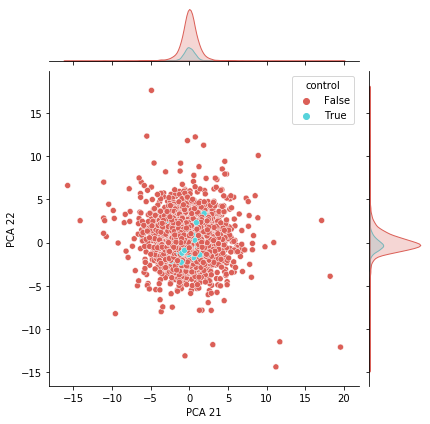

<Figure size 864x864 with 0 Axes>

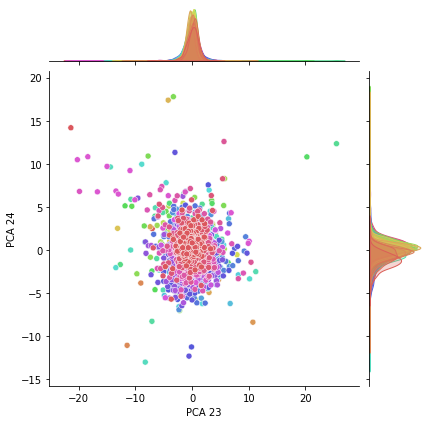

<Figure size 864x864 with 0 Axes>

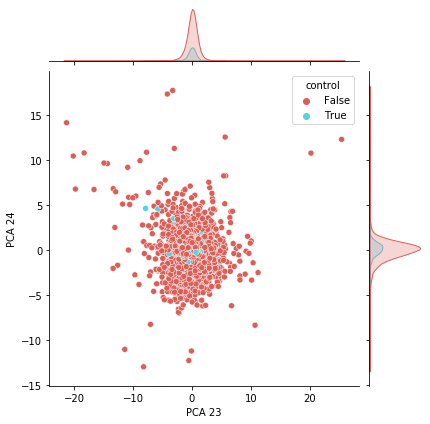

<Figure size 864x864 with 0 Axes>

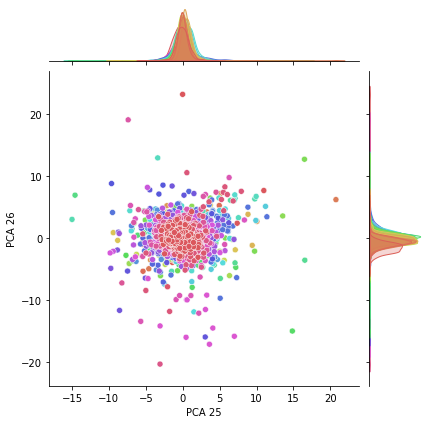

<Figure size 864x864 with 0 Axes>

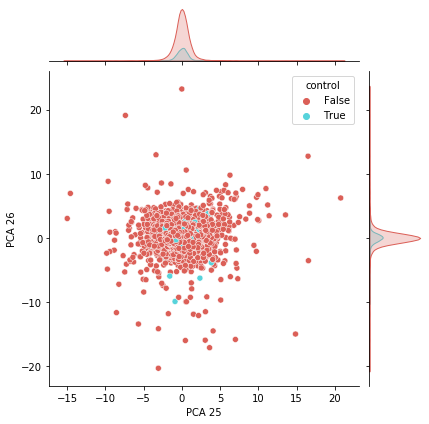

<Figure size 864x864 with 0 Axes>

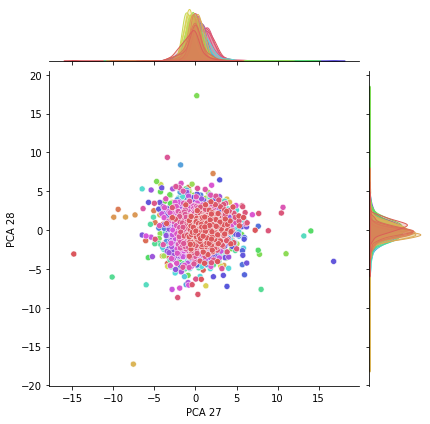

<Figure size 864x864 with 0 Axes>

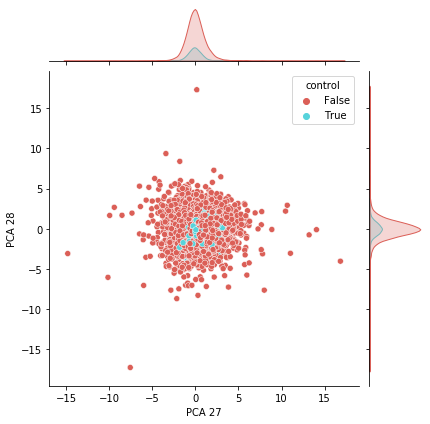

<Figure size 864x864 with 0 Axes>

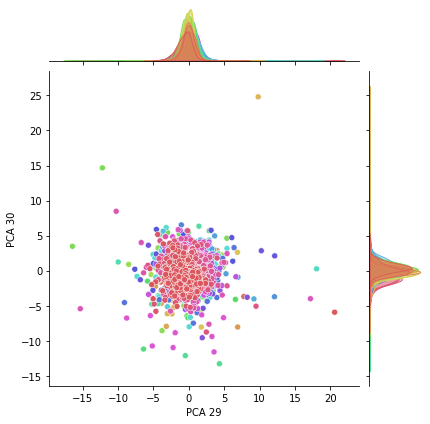

<Figure size 864x864 with 0 Axes>

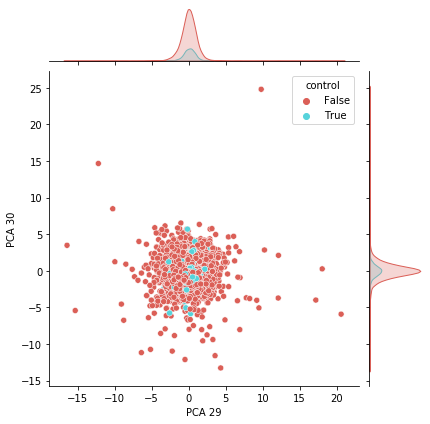

In [12]:
to_plot = useful_components - useful_components % 2
for i in range(1, to_plot, 2):
    plt.figure(figsize=(12,12))
    color = sb.color_palette("hls", 55)
    sb.jointplot(data = principalDf, x="PCA {}".format(i), y="PCA {}".format(i+1), palette=color, hue = 'Plate', legend=False)
    plt.show()
    plt.figure(figsize=(12,12))
    color = sb.color_palette("hls", 2)
    sb.jointplot(data = principalDf, x="PCA {}".format(i), y="PCA {}".format(i+1), palette=color, hue = 'control')
    plt.show()

# Run UMAP

In [13]:
reducer = umap.UMAP()
embeddings = reducer.fit_transform(well_data)
principalDf = pd.concat((pd.DataFrame(embeddings, columns=["UMAP 1", "UMAP 2"]), principalDf.reset_index(drop=True)), axis=1)

In [14]:
principalDf.reset_index(drop=True, inplace = True)

In [15]:
principalDf

,UMAP 1,UMAP 2,Plate,Well,Treatment,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,...,PCA 22,PCA 23,PCA 24,PCA 25,PCA 26,PCA 27,PCA 28,PCA 29,PCA 30,control
0,5.716973,-4.811526,24277,a01,BRD-K18250272-003-03-7@3.02251611288227,0.803877,-0.496738,0.357626,-1.143157,1.196746,...,1.712246,-0.138847,-1.944361,0.903635,-1.719224,-0.160666,-0.416938,-1.753644,2.120253,False
1,5.697430,-4.911526,24277,a02,BRD-K18316707-001-01-9@5,-0.417697,-0.480228,-0.553191,-1.016881,0.840403,...,0.803558,-1.011283,-1.724776,-0.516683,-1.383603,-1.247365,0.520390,-1.317356,1.513975,False
2,5.620891,-4.961471,24277,a03,BRD-K18438502-001-02-6@5,0.239526,-0.200747,-0.449086,-0.162870,0.495743,...,1.498321,0.554423,-1.867154,0.450700,-1.770751,-0.016655,0.272406,-1.672488,1.375206,False
3,5.705944,-5.030110,24277,a04,BRD-K18550767-001-02-8@5,-0.358357,-0.738599,-0.469501,-0.243575,0.678622,...,2.237514,0.466748,-1.720541,-1.103080,-1.197428,-1.054900,1.189872,-1.738928,1.038648,False
4,5.797007,-4.998841,24277,a05,BRD-K18574842-323-03-3@2.19548690004561,0.371208,-0.783353,-1.087288,-0.339886,0.934341,...,1.035184,0.156786,-1.718701,-0.588899,-1.943357,-0.088467,-0.184634,-2.000898,0.926091,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21101,-1.849531,5.899273,26247,p20,BRD-K98157055-001-04-2@5,-0.790884,-1.488973,-0.198025,0.406681,0.814852,...,-0.616122,-0.921242,-0.456039,-1.979500,-0.189347,2.705557,-0.607316,-1.968420,-1.236117,False
21102,-1.898103,6.320349,26247,p21,BRD-K98174813-001-05-7@5.8974378934918,-1.799871,-1.934557,-0.648851,0.918831,0.486774,...,0.036097,0.036748,0.830096,-1.432161,-0.498915,2.013861,-0.212558,-3.128303,0.174825,False
21103,-2.027417,6.422115,26247,p22,BRD-K98281970-001-02-6@5,-1.449309,-1.987786,0.451738,0.099258,0.865631,...,-0.539911,-2.136250,1.976254,-1.135514,0.919905,5.350979,0.547770,-3.261891,-0.523245,False
21104,4.565218,1.667793,26247,p23,BRD-K98297262-001-01-1@5,8.188129,7.400948,-0.813337,-2.659504,2.328704,...,-2.101510,0.538255,-2.308835,0.854496,-1.327361,2.046558,-2.580890,-4.345022,0.664201,False


<Figure size 864x864 with 0 Axes>

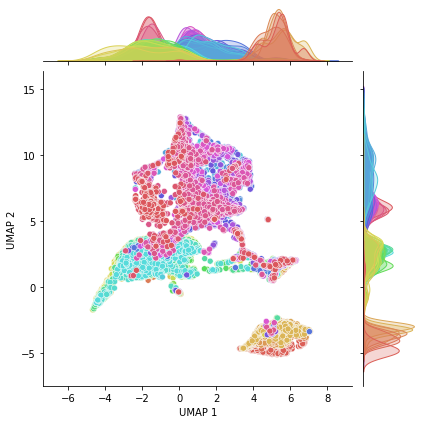

<Figure size 864x864 with 0 Axes>

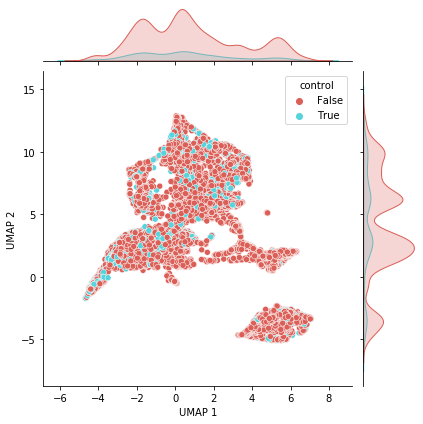

In [16]:
plt.figure(figsize=(12,12))
color = sb.color_palette("hls", 55)
sb.jointplot(data = principalDf, x="UMAP 1", y="UMAP 2", palette=color, hue = 'Plate', legend = False)
plt.figure(figsize=(12,12))
color = sb.color_palette("hls", 2)
sb.jointplot(data = principalDf, x="UMAP 1", y="UMAP 2", palette=color, hue = 'control')

# Calculate correlations of individiaul wells vs median plate profile of DMSO control

In [17]:
median_controls = well_data_pd[well_data_pd['Treatment'] == 'NA@NA'].drop(columns=['Treatment','Replicate']).groupby(["Plate"]).median().reset_index()

In [18]:
correlations_df = pd.DataFrame(columns=['Plate', 'Well', 'Treatment', 'Replicate', 'control_corr'])
for i in tqdm(well_data_pd.index):
    well_profile = well_data_pd.loc[i, columns].to_numpy()
    plate_control_profile = median_controls[median_controls['Plate'] == well_data_pd.loc[i, 'Plate']][columns].to_numpy()[0]
    correlations_df.loc[i] = [  well_data_pd.loc[i, 'Plate'],  well_data_pd.loc[i, 'Well'],  well_data_pd.loc[i, 'Treatment'],  well_data_pd.loc[i, 'Replicate'], scipy.stats.pearsonr(well_profile, plate_control_profile)[0] ]

100%|██████████| 21106/21106 [09:09<00:00, 38.38it/s]


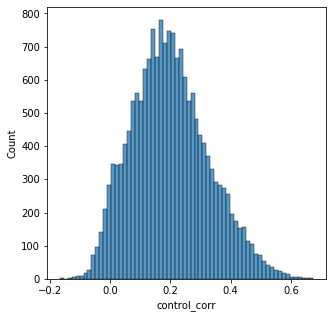

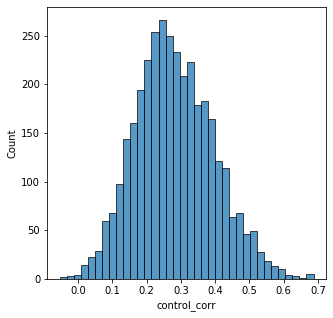

In [19]:
#plot distribution of correlations without controls
plt.figure(figsize=(5,5))
sb.histplot(correlations_df[~correlations_df['Treatment'].isin(['NA@NA'])]['control_corr'])
plt.figure(figsize=(5,5))
sb.histplot(correlations_df[correlations_df['Treatment'].isin(['NA@NA'])]['control_corr'])

In [20]:
principalDf = pd.merge(correlations_df, principalDf, right_on = ['Plate', 'Well', 'Treatment'], left_on = ['Plate', 'Well', 'Treatment'] )
principalDf

,Plate,Well,Treatment,Replicate,control_corr,UMAP 1,UMAP 2,PCA 1,PCA 2,PCA 3,...,PCA 22,PCA 23,PCA 24,PCA 25,PCA 26,PCA 27,PCA 28,PCA 29,PCA 30,control
0,24277,a01,BRD-K18250272-003-03-7@3.02251611288227,1,0.258430,5.716973,-4.811526,0.803877,-0.496738,0.357626,...,1.712246,-0.138847,-1.944361,0.903635,-1.719224,-0.160666,-0.416938,-1.753644,2.120253,False
1,24277,a02,BRD-K18316707-001-01-9@5,1,0.331492,5.697430,-4.911526,-0.417697,-0.480228,-0.553191,...,0.803558,-1.011283,-1.724776,-0.516683,-1.383603,-1.247365,0.520390,-1.317356,1.513975,False
2,24277,a03,BRD-K18438502-001-02-6@5,1,0.418390,5.620891,-4.961471,0.239526,-0.200747,-0.449086,...,1.498321,0.554423,-1.867154,0.450700,-1.770751,-0.016655,0.272406,-1.672488,1.375206,False
3,24277,a04,BRD-K18550767-001-02-8@5,1,0.437224,5.705944,-5.030110,-0.358357,-0.738599,-0.469501,...,2.237514,0.466748,-1.720541,-1.103080,-1.197428,-1.054900,1.189872,-1.738928,1.038648,False
4,24277,a05,BRD-K18574842-323-03-3@2.19548690004561,1,0.476446,5.797007,-4.998841,0.371208,-0.783353,-1.087288,...,1.035184,0.156786,-1.718701,-0.588899,-1.943357,-0.088467,-0.184634,-2.000898,0.926091,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21101,26247,p20,BRD-K98157055-001-04-2@5,8,0.370037,-1.849531,5.899273,-0.790884,-1.488973,-0.198025,...,-0.616122,-0.921242,-0.456039,-1.979500,-0.189347,2.705557,-0.607316,-1.968420,-1.236117,False
21102,26247,p21,BRD-K98174813-001-05-7@5.8974378934918,8,0.386372,-1.898103,6.320349,-1.799871,-1.934557,-0.648851,...,0.036097,0.036748,0.830096,-1.432161,-0.498915,2.013861,-0.212558,-3.128303,0.174825,False
21103,26247,p22,BRD-K98281970-001-02-6@5,8,0.331416,-2.027417,6.422115,-1.449309,-1.987786,0.451738,...,-0.539911,-2.136250,1.976254,-1.135514,0.919905,5.350979,0.547770,-3.261891,-0.523245,False
21104,26247,p23,BRD-K98297262-001-01-1@5,8,0.069474,4.565218,1.667793,8.188129,7.400948,-0.813337,...,-2.101510,0.538255,-2.308835,0.854496,-1.327361,2.046558,-2.580890,-4.345022,0.664201,False


# Selection of the candidates based on PCA

In [21]:
#logic for selection
plates_wells = []
for pca_c in range(1,useful_components+1):
    median_pca = principalDf[principalDf['Treatment']=='NA@NA']['PCA {}'.format(pca_c)].median()
    temp = []
    for i in principalDf.index:
        temp.append(abs(median_pca - principalDf.loc[i, 'PCA {}'.format(pca_c)]))
    
    idx = (-np.array(temp)).argsort()[:int(round(len(temp)*pca.explained_variance_ratio_[pca_c-1]))]
    for idd in idx:
        plates_wells.append((principalDf.loc[idd, 'Plate'], principalDf.loc[idd, 'Well'] )) 

In [22]:
len(set(plates_wells))

3771

# Selection of the candidates based on UMAP

(array([  12.,   28.,   82.,  226.,  348.,  494.,  598.,  758.,  688.,
         887., 1112., 1259., 1421., 1207.,  997.,  783.,  581.,  469.,
         387.,  411.,  480.,  493.,  503.,  413.,  432.,  454.,  638.,
         560.,  375.,  323.,  305.,  190.,  146.,  113.,   77.,   64.,
          47.,   32.,  101.,  191.,  295.,  352.,  341.,  426.,  299.,
         240.,  183.,   68.,   78.,  139.]),
 array([ 0.12275031,  0.33406936,  0.5453884 ,  0.75670745,  0.96802649,
         1.17934554,  1.39066458,  1.60198363,  1.81330268,  2.02462172,
         2.23594077,  2.44725981,  2.65857886,  2.8698979 ,  3.08121695,
         3.29253599,  3.50385504,  3.71517408,  3.92649313,  4.13781218,
         4.34913122,  4.56045027,  4.77176931,  4.98308836,  5.1944074 ,
         5.40572645,  5.61704549,  5.82836454,  6.03968358,  6.25100263,
         6.46232167,  6.67364072,  6.88495977,  7.09627881,  7.30759786,
         7.5189169 ,  7.73023595,  7.94155499,  8.15287404,  8.36419308,
         8.57551

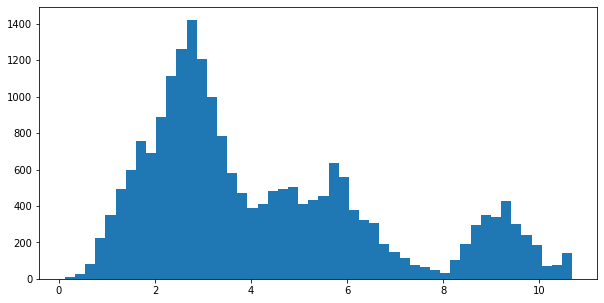

In [23]:
#for UMAP calculate mean point for EMPTY, and calculate distances 
#for all wells and additionally for EMPTY wells (to calculate average distance)
mean_umap1 = principalDf[principalDf['Treatment']=='NA@NA']['UMAP 1'].mean()
mean_umap2 = principalDf[principalDf['Treatment']=='NA@NA']['UMAP 2'].mean()
temp = []
temp_empty = []
for i in principalDf.index:
    temp.append(scipy.spatial.distance.euclidean([mean_umap1, mean_umap2], [principalDf.loc[i, 'UMAP 1'], principalDf.loc[i, 'UMAP 2']]))
    if principalDf.loc[i, 'Treatment'] =='NA@NA':
        temp_empty.append(scipy.spatial.distance.euclidean([mean_umap1, mean_umap2], [principalDf.loc[i, 'UMAP 1'], principalDf.loc[i, 'UMAP 2']]))

plt.figure(figsize=(10,5))
plt.hist(temp, bins=50)

In [24]:
#The arbitary selection here would be to select wells with the distance which exceeds the 95th percentile distance of EMPTY
#append to existing array to plates_wells
idx = list(np.argwhere(np.array(temp) > np.percentile(temp_empty, 95)).flatten())
for idd in idx:
    plates_wells.append((principalDf.loc[idd, 'Plate'], principalDf.loc[idd, 'Well'] )) 


In [25]:
len(set(plates_wells))

4868

# Selection of the candidates based on correlations (don't run)

In [ ]:
#Get the well with correlation value below 5th percentile of the correlations inside

''' commented out
idx = list(principalDf[principalDf['control_corr'] < np.percentile(principalDf[principalDf['Treatment'] == 'NA@NA']['control_corr'], 5)].index)
for idd in idx:
    plates_wells.append((principalDf.loc[idd, 'Plate'], principalDf.loc[idd, 'Well'] ))
'''   


# Get final candidates

In [26]:
candidates = pd.DataFrame(set(plates_wells), columns =['Plate', 'Well'])
candidates = pd.merge(candidates, principalDf, right_on = ['Plate', 'Well'], left_on = ['Plate', 'Well'] )
candidates

,Plate,Well,Treatment,Replicate,control_corr,UMAP 1,UMAP 2,PCA 1,PCA 2,PCA 3,...,PCA 22,PCA 23,PCA 24,PCA 25,PCA 26,PCA 27,PCA 28,PCA 29,PCA 30,control
0,24310,d14,BRD-K45662124-001-01-8@5,1,-0.038261,0.823118,1.340474,-2.042258,3.821056,0.466931,...,2.114226,2.370375,-1.988011,-1.497251,-2.331772,2.927861,-1.808009,0.775116,-1.425334,False
1,25989,n19,BRD-K75844781-001-01-9@5,5,0.326879,1.497749,5.724865,-1.755605,-0.843121,-1.177231,...,-1.629880,0.098228,-1.280819,-0.703602,-0.928726,0.874605,-0.215236,0.994501,-0.912960,False
2,24300,f21,BRD-A17065207-001-06-9@5,4,-0.000607,5.541012,1.715657,37.697166,8.666707,-0.645144,...,-4.173867,0.272554,0.237838,-0.022263,-1.290314,-1.696661,1.084253,1.330406,1.458561,False
3,24293,b11,BRD-K80325895-001-02-3@0.5,4,0.444037,5.227162,-3.871122,-0.799756,-0.764609,-0.127222,...,1.027640,0.486905,0.127987,-0.300214,-0.629933,-0.305570,-0.178940,-0.112006,0.733623,False
4,25990,a09,BRD-K68336408-001-03-4@7.9,6,0.099382,0.521966,10.002936,-1.321198,2.351806,2.745512,...,1.616862,-1.914518,-4.609860,-1.300147,2.355265,1.620360,1.876196,-0.836054,-0.812187,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,24277,g17,BRD-K28307902-001-04-3@5,1,0.437769,6.729673,-4.250457,-0.957204,-0.730691,-0.351072,...,0.530718,-1.695374,-0.713395,-0.460608,-1.689387,0.480411,0.259175,-0.880193,0.817687,False
4864,24293,d18,BRD-K83028735-003-03-8@2.57143577144873,4,0.371135,5.808652,-3.700243,-0.725084,-0.821814,-0.383096,...,0.535387,0.395516,-0.303249,0.390778,-0.404383,-0.282466,0.051894,-0.458016,0.262957,False
4865,25955,a01,BRD-A97104540-004-04-4@2.60237157244243,5,0.069461,2.848603,8.453884,-0.201242,-0.332261,-0.063914,...,0.343530,-2.231294,0.326803,-2.078994,0.765922,0.922554,0.525824,-1.583208,1.298917,False
4866,24280,e16,BRD-K84709232-001-02-6@5,3,0.147220,5.364001,-4.308411,-1.435211,0.410207,-0.987540,...,2.616534,1.498983,-2.587253,-0.656652,-1.534995,1.916868,-0.474644,0.518718,-0.264573,False


# Final clean-up

In [27]:
#remove controls from candidates and mismatch\truncated
candidates = candidates[~candidates['Treatment'].isin(['NA@NA'])]
candidates

,Plate,Well,Treatment,Replicate,control_corr,UMAP 1,UMAP 2,PCA 1,PCA 2,PCA 3,...,PCA 22,PCA 23,PCA 24,PCA 25,PCA 26,PCA 27,PCA 28,PCA 29,PCA 30,control
0,24310,d14,BRD-K45662124-001-01-8@5,1,-0.038261,0.823118,1.340474,-2.042258,3.821056,0.466931,...,2.114226,2.370375,-1.988011,-1.497251,-2.331772,2.927861,-1.808009,0.775116,-1.425334,False
1,25989,n19,BRD-K75844781-001-01-9@5,5,0.326879,1.497749,5.724865,-1.755605,-0.843121,-1.177231,...,-1.629880,0.098228,-1.280819,-0.703602,-0.928726,0.874605,-0.215236,0.994501,-0.912960,False
2,24300,f21,BRD-A17065207-001-06-9@5,4,-0.000607,5.541012,1.715657,37.697166,8.666707,-0.645144,...,-4.173867,0.272554,0.237838,-0.022263,-1.290314,-1.696661,1.084253,1.330406,1.458561,False
3,24293,b11,BRD-K80325895-001-02-3@0.5,4,0.444037,5.227162,-3.871122,-0.799756,-0.764609,-0.127222,...,1.027640,0.486905,0.127987,-0.300214,-0.629933,-0.305570,-0.178940,-0.112006,0.733623,False
4,25990,a09,BRD-K68336408-001-03-4@7.9,6,0.099382,0.521966,10.002936,-1.321198,2.351806,2.745512,...,1.616862,-1.914518,-4.609860,-1.300147,2.355265,1.620360,1.876196,-0.836054,-0.812187,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,24277,g17,BRD-K28307902-001-04-3@5,1,0.437769,6.729673,-4.250457,-0.957204,-0.730691,-0.351072,...,0.530718,-1.695374,-0.713395,-0.460608,-1.689387,0.480411,0.259175,-0.880193,0.817687,False
4864,24293,d18,BRD-K83028735-003-03-8@2.57143577144873,4,0.371135,5.808652,-3.700243,-0.725084,-0.821814,-0.383096,...,0.535387,0.395516,-0.303249,0.390778,-0.404383,-0.282466,0.051894,-0.458016,0.262957,False
4865,25955,a01,BRD-A97104540-004-04-4@2.60237157244243,5,0.069461,2.848603,8.453884,-0.201242,-0.332261,-0.063914,...,0.343530,-2.231294,0.326803,-2.078994,0.765922,0.922554,0.525824,-1.583208,1.298917,False
4866,24280,e16,BRD-K84709232-001-02-6@5,3,0.147220,5.364001,-4.308411,-1.435211,0.410207,-0.987540,...,2.616534,1.498983,-2.587253,-0.656652,-1.534995,1.916868,-0.474644,0.518718,-0.264573,False


(array([654., 872., 594.,   0., 468., 300.,   0., 246., 364., 920.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

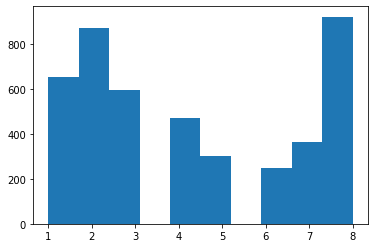

In [33]:
plt.hist(candidates['Treatment'].map(candidates['Treatment'].value_counts()))

In [34]:
#remove the perturbations with less than 3 replicates left out of 4
candidates = candidates[candidates['Treatment'].map(candidates['Treatment'].value_counts()) > 4]
candidates['Treatment'].value_counts()

BRD-A22783572-065-01-3@5                   8
BRD-A37828317-001-02-2@5                   8
BRD-A19134330-001-03-8@4.77444946873555    8
BRD-A40022950-001-02-9@5                   8
BRD-K06426971-001-01-9@5                   8
                                          ..
BRD-K98521173-001-03-8@3.02607477854428    5
BRD-K89704198-001-04-0@5                   5
BRD-K92019075-001-02-0@5                   5
BRD-K44849676-001-03-0@6.63305494313296    5
BRD-K13211965-001-01-4@5                   5
Name: Treatment, Length: 268, dtype: int64

In [35]:
len(candidates['Treatment'].unique())

268

In [36]:
candidates.to_csv('cdrp_candidates.csv')